<a href="https://colab.research.google.com/github/AMRISMA/DataScience/blob/master/Data_Privacy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Introduction to differential privacy
#Datasets used: ["2017-18_NBA_salary.csv" and "patient.csv"]
#Import required packages & reading datasets
# Import PCA from Scikit-learn
from sklearn.decomposition import PCA
import pandas as pd 
!pip install faker
from faker import Faker
from sklearn.linear_model import LogisticRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 12.0 MB/s 


In [2]:
salaries = pd.read_csv('patient.csv')
df = pd.DataFrame(salaries)


In [3]:
# Explore the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,34,1,3,3,233,1,0,1,1,2.3,1,1,1,1
1,56,1,2,2,200,0,1,1,0,0.8,0,0,2,0
2,65,0,1,1,100,0,1,1,0,1.3,2,0,2,1
3,23,1,1,1,345,0,0,0,0,3.4,2,1,2,1
4,43,0,0,0,200,0,1,1,1,0.4,2,0,2,1


In [4]:
##------------Data masking with PCA and Scikit-learn------------
# Obtain the data without the target column
x_data = df.drop(['target'], axis = 1)

# Target column as array of values
y = df.target.values

In [5]:
# Initialize PCA with number of components to be the same as the number of columns
pca = PCA(n_components=len(x_data.columns))

In [6]:
# Apply PCA to the data
x_data_pca = pca.fit_transform(x_data)

In [7]:
# See the data
x_data_pca

array([[ 1.89346767e+01, -7.03244572e+00,  2.23261086e+00,
        -2.06657232e-01,  1.08155229e+00,  9.91043083e-01,
         5.59989479e-01,  3.33171001e-16, -7.79441207e-18,
        -3.40542670e-17,  5.73951594e-18,  1.39295286e-18,
        -1.03650764e-18],
       [-1.74390518e+01,  8.93260346e+00,  1.16116924e+00,
        -6.34362886e-01, -1.92063283e-01, -5.43886878e-01,
         4.59726195e-01,  5.95687415e-16,  5.77150480e-16,
         1.98326146e-16, -3.46651105e-17, -3.09207635e-18,
        -4.14661901e-18],
       [-1.17457275e+02,  1.11436615e-01, -5.81849308e-01,
         1.14905516e+00, -6.77690751e-03,  2.34593160e-02,
        -6.25079180e-03,  7.31188823e-16, -4.42454311e-16,
         4.55807680e-16, -8.14173111e-17,  9.04135103e-19,
         6.07096681e-18],
       [ 1.31126021e+02,  1.85586085e+00, -9.78401759e-01,
         8.13563680e-01,  6.01970606e-01, -3.00662312e-02,
        -2.68363397e-01,  3.51742571e-16,  1.50298516e-16,
        -1.05670856e-16, -7.82697248e

In [8]:
# Create a DataFrame from the resulting PCA transformed data
df_x_data_pca = pd.DataFrame(x_data_pca)

# Inspect the shape of the dataset
df_x_data_pca.shape


(30, 13)

In [9]:
##-----------Data utility after PCA data masking----------------
#-Perform classifcation with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [10]:
# Split the resulting dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x_data.to_numpy(), y, test_size=0.2)

# Create the model
lr = LogisticRegression(max_iter=200)
lr

lr.fit(x_train,y_train)
acc = lr.score(x_test, y_test) * 100
print("Test Accuracy is ", acc)

Test Accuracy is  100.0


In [11]:
# Split the resulting dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x_data_pca, y, test_size=0.2)

# Create the model
lr = LogisticRegression(max_iter=200)
lr

lr.fit(x_train,y_train)
acc = lr.score(x_test, y_test) * 100
print("Test Accuracy is ", acc)

Test Accuracy is  100.0


In [12]:
lr.fit(x_train,y_train)


LogisticRegression(max_iter=200)

In [13]:
acc = lr.score(x_test, y_test) * 100

In [14]:
print("Test Accuracy is ", acc)

Test Accuracy is  100.0


In [15]:
#Import required packages & reading datasets
from faker import Faker
salaries = pd.read_csv('2017-18_NBA_salary.csv')
clients_df = pd.DataFrame(salaries)


In [16]:
# Create fake data generator
fake_data = Faker()

In [17]:
##-------Generating other types of data--------
fake_data.name()

'Taylor Johnston'

In [18]:
##-------Generating other types of data--------
fake_data.name_male()


'Aaron Gutierrez'

In [19]:
##-------Generating other types of data--------
fake_data.name_female()

'Valerie Smith'

In [20]:
#Clients DataFrame
clients_df

,Name,Salary,NBA_Country,Gender,NBA_DraftNumber,Age,Tm,G,MP,PER,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Email,card_number
0,Zhou Qi,815615,China,Female,43,22,HOU,16,87,0.6,...,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,smarfan@gmail.com,3.600000e+15
1,Zaza Pachulia,3477600,Georgia,Male,42,33,GSW,66,937,16.8,...,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,bmarfan@gmail.com,3.600000e+15
2,Zach Randolph,12307692,USA,Male,19,36,SAC,59,1508,17.3,...,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,cmarfan@gmail.com,3.600000e+15
3,Zach LaVine,3202217,USA,Female,13,22,CHI,24,656,14.6,...,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,pmarfan@gmail.com,3.600000e+15
4,Zach Collins,3057240,USA,Male,10,20,POR,62,979,8.2,...,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,amarfan@gmail.com,3.600000e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Al Horford,27734405,Dominican Rep...,Male,3,31,BOS,70,2219,17.5,...,3.8,3.8,7.6,0.164,1.1,3.0,4.1,3.4,smarfan@gmail.com,3.600000e+15
481,Abdel Nader,1167333,Egypt,Male,58,24,BOS,44,463,5.7,...,-0.6,0.7,0.0,0.004,-5.3,0.3,-5.0,-0.3,smarfan@gmail.com,3.600000e+15
482,Aaron Harrison,83129,USA,Male,62,23,DAL,7,164,6.6,...,-0.1,0.2,0.1,0.019,-3.2,0.3,-2.9,0.0,smarfan@gmail.com,3.600000e+15
483,Aaron Gordon,5504420,USA,Male,4,22,ORL,55,1838,16.6,...,1.1,1.9,3.0,0.078,0.1,-0.1,0.1,1.0,smarfan@gmail.com,3.600000e+15


In [21]:
##-------------Making names match their gender----------------
##Generating unique names in the dataset
##Avoiding duplicates

# Import the Faker class
from faker import Faker

# Initialize a Faker class
fake_data = Faker()

# Generate a name according to the gender, that will be unique in the dataset
clients_df['name'] = [fake_data.unique.name_female() if x == "Female"
                      else fake_data.unique.name_male()
                      for x in clients_df['Gender']]

In [22]:
#Clients DataFrame
clients_df

,Name,Salary,NBA_Country,Gender,NBA_DraftNumber,Age,Tm,G,MP,PER,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Email,card_number,name
0,Zhou Qi,815615,China,Female,43,22,HOU,16,87,0.6,...,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,smarfan@gmail.com,3.600000e+15,Jocelyn Jordan
1,Zaza Pachulia,3477600,Georgia,Male,42,33,GSW,66,937,16.8,...,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,bmarfan@gmail.com,3.600000e+15,Ethan Stevens
2,Zach Randolph,12307692,USA,Male,19,36,SAC,59,1508,17.3,...,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,cmarfan@gmail.com,3.600000e+15,Gene Cline
3,Zach LaVine,3202217,USA,Female,13,22,CHI,24,656,14.6,...,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,pmarfan@gmail.com,3.600000e+15,Jennifer Clarke
4,Zach Collins,3057240,USA,Male,10,20,POR,62,979,8.2,...,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,amarfan@gmail.com,3.600000e+15,Derek Castro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Al Horford,27734405,Dominican Rep...,Male,3,31,BOS,70,2219,17.5,...,3.8,7.6,0.164,1.1,3.0,4.1,3.4,smarfan@gmail.com,3.600000e+15,Greg Thornton
481,Abdel Nader,1167333,Egypt,Male,58,24,BOS,44,463,5.7,...,0.7,0.0,0.004,-5.3,0.3,-5.0,-0.3,smarfan@gmail.com,3.600000e+15,Timothy Atkinson
482,Aaron Harrison,83129,USA,Male,62,23,DAL,7,164,6.6,...,0.2,0.1,0.019,-3.2,0.3,-2.9,0.0,smarfan@gmail.com,3.600000e+15,James Davidson
483,Aaron Gordon,5504420,USA,Male,4,22,ORL,55,1838,16.6,...,1.9,3.0,0.078,0.1,-0.1,0.1,1.0,smarfan@gmail.com,3.600000e+15,Frank White


In [23]:
##----------------Generating a random city------------------
# Generating a random city
clients_df['city'] = [fake_data.city()
                      for x in range(len(clients_df))]
clients_df.head()

,Name,Salary,NBA_Country,Gender,NBA_DraftNumber,Age,Tm,G,MP,PER,...,WS,WS/48,OBPM,DBPM,BPM,VORP,Email,card_number,name,city
0,Zhou Qi,815615,China,Female,43,22,HOU,16,87,0.6,...,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,smarfan@gmail.com,3.600000e+15,Jocelyn Jordan,Keithton
1,Zaza Pachulia,3477600,Georgia,Male,42,33,GSW,66,937,16.8,...,3.1,0.160,-0.6,1.3,0.8,0.7,bmarfan@gmail.com,3.600000e+15,Ethan Stevens,North Colin
2,Zach Randolph,12307692,USA,Male,19,36,SAC,59,1508,17.3,...,1.4,0.046,-0.6,-1.3,-1.9,0.0,cmarfan@gmail.com,3.600000e+15,Gene Cline,North Lisa
3,Zach LaVine,3202217,USA,Female,13,22,CHI,24,656,14.6,...,0.4,0.027,-0.7,-2.0,-2.6,-0.1,pmarfan@gmail.com,3.600000e+15,Jennifer Clarke,Jaredside
4,Zach Collins,3057240,USA,Male,10,20,POR,62,979,8.2,...,0.8,0.038,-3.7,0.9,-2.9,-0.2,amarfan@gmail.com,3.600000e+15,Derek Castro,Lake Jennymouth


In [24]:
##-----------------Generating emails-------------------
# Generating emails with different domains
clients_df['contact email'] = [fake_data.company_email()
for x in range(len(clients_df))]

# Explore the dataset
clients_df.head()


,Name,Salary,NBA_Country,Gender,NBA_DraftNumber,Age,Tm,G,MP,PER,...,WS/48,OBPM,DBPM,BPM,VORP,Email,card_number,name,city,contact email
0,Zhou Qi,815615,China,Female,43,22,HOU,16,87,0.6,...,-0.121,-10.6,0.5,-10.1,-0.2,smarfan@gmail.com,3.600000e+15,Jocelyn Jordan,Keithton,justin33@peterson.com
1,Zaza Pachulia,3477600,Georgia,Male,42,33,GSW,66,937,16.8,...,0.160,-0.6,1.3,0.8,0.7,bmarfan@gmail.com,3.600000e+15,Ethan Stevens,North Colin,andersonemma@graham.info
2,Zach Randolph,12307692,USA,Male,19,36,SAC,59,1508,17.3,...,0.046,-0.6,-1.3,-1.9,0.0,cmarfan@gmail.com,3.600000e+15,Gene Cline,North Lisa,srandall@weber.com
3,Zach LaVine,3202217,USA,Female,13,22,CHI,24,656,14.6,...,0.027,-0.7,-2.0,-2.6,-0.1,pmarfan@gmail.com,3.600000e+15,Jennifer Clarke,Jaredside,collinsjose@anderson.com
4,Zach Collins,3057240,USA,Male,10,20,POR,62,979,8.2,...,0.038,-3.7,0.9,-2.9,-0.2,amarfan@gmail.com,3.600000e+15,Derek Castro,Lake Jennymouth,gprice@greer.info


In [25]:
# Generating emails with company like domains and username similar to name
clients_df['Contact email'] = [x.replace(" ","") + "@" +
                               fake_data.domain_name()
                               for x in clients_df['name']]
# Explore the resulting DataFrame
clients_df.head()                               

,Name,Salary,NBA_Country,Gender,NBA_DraftNumber,Age,Tm,G,MP,PER,...,OBPM,DBPM,BPM,VORP,Email,card_number,name,city,contact email,Contact email
0,Zhou Qi,815615,China,Female,43,22,HOU,16,87,0.6,...,-10.6,0.5,-10.1,-0.2,smarfan@gmail.com,3.600000e+15,Jocelyn Jordan,Keithton,justin33@peterson.com,JocelynJordan@harris.com
1,Zaza Pachulia,3477600,Georgia,Male,42,33,GSW,66,937,16.8,...,-0.6,1.3,0.8,0.7,bmarfan@gmail.com,3.600000e+15,Ethan Stevens,North Colin,andersonemma@graham.info,EthanStevens@kelley.com
2,Zach Randolph,12307692,USA,Male,19,36,SAC,59,1508,17.3,...,-0.6,-1.3,-1.9,0.0,cmarfan@gmail.com,3.600000e+15,Gene Cline,North Lisa,srandall@weber.com,GeneCline@hughes.com
3,Zach LaVine,3202217,USA,Female,13,22,CHI,24,656,14.6,...,-0.7,-2.0,-2.6,-0.1,pmarfan@gmail.com,3.600000e+15,Jennifer Clarke,Jaredside,collinsjose@anderson.com,JenniferClarke@schneider-oneal.com
4,Zach Collins,3057240,USA,Male,10,20,POR,62,979,8.2,...,-3.7,0.9,-2.9,-0.2,amarfan@gmail.com,3.600000e+15,Derek Castro,Lake Jennymouth,gprice@greer.info,DerekCastro@freeman.com


In [26]:
##------------------Generating dates----------------------
##Dates between two times

# Generating dates between two times
clients_df['date'] = [fake_data.date_between(start_date="-10y", end_date="now")
                               for x in range(len(clients_df))]

# Explore the resulting DataFrame
clients_df.head()

,Name,Salary,NBA_Country,Gender,NBA_DraftNumber,Age,Tm,G,MP,PER,...,DBPM,BPM,VORP,Email,card_number,name,city,contact email,Contact email,date
0,Zhou Qi,815615,China,Female,43,22,HOU,16,87,0.6,...,0.5,-10.1,-0.2,smarfan@gmail.com,3.600000e+15,Jocelyn Jordan,Keithton,justin33@peterson.com,JocelynJordan@harris.com,2015-12-09
1,Zaza Pachulia,3477600,Georgia,Male,42,33,GSW,66,937,16.8,...,1.3,0.8,0.7,bmarfan@gmail.com,3.600000e+15,Ethan Stevens,North Colin,andersonemma@graham.info,EthanStevens@kelley.com,2013-06-19
2,Zach Randolph,12307692,USA,Male,19,36,SAC,59,1508,17.3,...,-1.3,-1.9,0.0,cmarfan@gmail.com,3.600000e+15,Gene Cline,North Lisa,srandall@weber.com,GeneCline@hughes.com,2018-05-12
3,Zach LaVine,3202217,USA,Female,13,22,CHI,24,656,14.6,...,-2.0,-2.6,-0.1,pmarfan@gmail.com,3.600000e+15,Jennifer Clarke,Jaredside,collinsjose@anderson.com,JenniferClarke@schneider-oneal.com,2020-04-15
4,Zach Collins,3057240,USA,Male,10,20,POR,62,979,8.2,...,0.9,-2.9,-0.2,amarfan@gmail.com,3.600000e+15,Derek Castro,Lake Jennymouth,gprice@greer.info,DerekCastro@freeman.com,2022-08-05


In [27]:
#---------Generating cities following a probabilistic distribution--------------
##When imitating a real dataset, we can avoid leaking the real names of values.

# Import numpy
import numpy as np

# Obtain or specify the probabilities
p = (0.58, 0.23, 0.16, 0.03)
cities = ["New York","Chicago","Seattle","Dallas"]

# Generate the cities from the selected ones following a distribution
clients_df['city'] = np.random.choice(cities, size=len(clients_df), p=p)

# See the resulting dataset
clients_df.head()

,Name,Salary,NBA_Country,Gender,NBA_DraftNumber,Age,Tm,G,MP,PER,...,DBPM,BPM,VORP,Email,card_number,name,city,contact email,Contact email,date
0,Zhou Qi,815615,China,Female,43,22,HOU,16,87,0.6,...,0.5,-10.1,-0.2,smarfan@gmail.com,3.600000e+15,Jocelyn Jordan,New York,justin33@peterson.com,JocelynJordan@harris.com,2015-12-09
1,Zaza Pachulia,3477600,Georgia,Male,42,33,GSW,66,937,16.8,...,1.3,0.8,0.7,bmarfan@gmail.com,3.600000e+15,Ethan Stevens,New York,andersonemma@graham.info,EthanStevens@kelley.com,2013-06-19
2,Zach Randolph,12307692,USA,Male,19,36,SAC,59,1508,17.3,...,-1.3,-1.9,0.0,cmarfan@gmail.com,3.600000e+15,Gene Cline,Seattle,srandall@weber.com,GeneCline@hughes.com,2018-05-12
3,Zach LaVine,3202217,USA,Female,13,22,CHI,24,656,14.6,...,-2.0,-2.6,-0.1,pmarfan@gmail.com,3.600000e+15,Jennifer Clarke,New York,collinsjose@anderson.com,JenniferClarke@schneider-oneal.com,2020-04-15
4,Zach Collins,3057240,USA,Male,10,20,POR,62,979,8.2,...,0.9,-2.9,-0.2,amarfan@gmail.com,3.600000e+15,Derek Castro,Seattle,gprice@greer.info,DerekCastro@freeman.com,2022-08-05


In [28]:
##------------Creating synthetic datasets using scikit-learn--------------
##Sample from a normal distribution

import numpy as np

# Create new pandas DataFrame
new_measures = pd.DataFrame()

# Selecting the mean/center values and the standard deviation of the sample
mean = 65
standard_deviation = 2

# Generating the sample
new_measures['Height'] = np.random.normal(mean, standard_deviation, 10000)

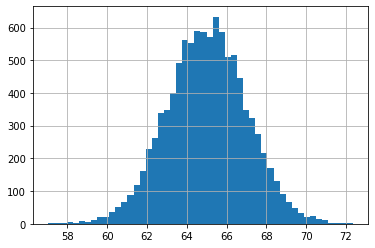

In [29]:
# Draw histogram to see the resulting heights distribution
new_measures['Height'].hist(bins=50)

In [30]:
##-----------------Synthetic data for classification-----------------
# Import make_classification from sklearn datasets module

from sklearn.datasets import make_classification

# Generate the samples and their labels
x, y = make_classification(n_samples=1000,
                           n_classes=2,
                           n_informative=2,
                           n_features=4,
                           n_clusters_per_class=2,
                           class_sep=1)

In [31]:
# See the generated data and labels
print(x.shape)
print(y.shape)
print(x)

(1000, 4)
(1000,)
[[ 0.55043393  0.59978446  0.25795327 -0.96737745]
 [-0.12111624  0.55833876  0.51380217 -0.44572245]
 [ 0.05912644 -1.24204328 -1.05212178  1.14250209]
 ...
 [ 2.4824937  -2.89637023 -3.46634111  0.98101753]
 [ 1.64385947 -2.22642509 -2.55033094  0.94393429]
 [-1.65015053  0.90315833  1.45933582  0.32302171]]


In [ ]:
##--------------------Synthetic data for clustering-------------------------
# Import the datasets module for generating clustering datasets
from sklearn.datasets import make_blobs

# Specify a value for standard deviation
standard_deviation = 1.5

# Generate the data and labels of the dataset
x, labels = make_blobs(n_features=3,
                       centers=4,
                       cluster_std=standard_deviation)

# See the shape of the generated data
print(x.shape)

(100, 3)


In [32]:
# Explore the dataset
clients_df.head()

,Name,Salary,NBA_Country,Gender,NBA_DraftNumber,Age,Tm,G,MP,PER,...,DBPM,BPM,VORP,Email,card_number,name,city,contact email,Contact email,date
0,Zhou Qi,815615,China,Female,43,22,HOU,16,87,0.6,...,0.5,-10.1,-0.2,smarfan@gmail.com,3.600000e+15,Jocelyn Jordan,New York,justin33@peterson.com,JocelynJordan@harris.com,2015-12-09
1,Zaza Pachulia,3477600,Georgia,Male,42,33,GSW,66,937,16.8,...,1.3,0.8,0.7,bmarfan@gmail.com,3.600000e+15,Ethan Stevens,New York,andersonemma@graham.info,EthanStevens@kelley.com,2013-06-19
2,Zach Randolph,12307692,USA,Male,19,36,SAC,59,1508,17.3,...,-1.3,-1.9,0.0,cmarfan@gmail.com,3.600000e+15,Gene Cline,Seattle,srandall@weber.com,GeneCline@hughes.com,2018-05-12
3,Zach LaVine,3202217,USA,Female,13,22,CHI,24,656,14.6,...,-2.0,-2.6,-0.1,pmarfan@gmail.com,3.600000e+15,Jennifer Clarke,New York,collinsjose@anderson.com,JenniferClarke@schneider-oneal.com,2020-04-15
4,Zach Collins,3057240,USA,Male,10,20,POR,62,979,8.2,...,0.9,-2.9,-0.2,amarfan@gmail.com,3.600000e+15,Derek Castro,Seattle,gprice@greer.info,DerekCastro@freeman.com,2022-08-05


In [33]:
# Explore the dataset
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             485 non-null    object 
 1   Salary           485 non-null    int64  
 2   NBA_Country      485 non-null    object 
 3   Gender           485 non-null    object 
 4   NBA_DraftNumber  485 non-null    int64  
 5   Age              485 non-null    int64  
 6   Tm               485 non-null    object 
 7   G                485 non-null    int64  
 8   MP               485 non-null    int64  
 9   PER              485 non-null    float64
 10  TS%              483 non-null    float64
 11  3PAr             483 non-null    float64
 12  FTr              483 non-null    float64
 13  ORB%             485 non-null    float64
 14  DRB%             485 non-null    float64
 15  TRB%             485 non-null    float64
 16  AST%             485 non-null    float64
 17  STL%            

In [34]:
# Explore the dataset
clients_df.nunique()

Name               483
Salary             303
NBA_Country         44
Gender               2
NBA_DraftNumber     60
Age                 23
Tm                  31
G                   77
MP                 441
PER                205
TS%                222
3PAr               305
FTr                277
ORB%               133
DRB%               203
TRB%               167
AST%               226
STL%                40
BLK%                65
TOV%               165
USG%               198
OWS                 80
DWS                 45
WS                  99
WS/48              236
OBPM               131
DBPM               108
BPM                156
VORP                59
Email                6
card_number          1
name               485
city                 4
contact email      485
Contact email      485
date               452
dtype: int64

In [35]:
##---------------------Suppressing unique attributes-------------------
# Apply attribute suppression on the Age column
suppressed_df = clients_df.drop('Age', axis="columns")

# Check the head of the resulting DataFrame
suppressed_df.head()

,Name,Salary,NBA_Country,Gender,NBA_DraftNumber,Tm,G,MP,PER,TS%,...,DBPM,BPM,VORP,Email,card_number,name,city,contact email,Contact email,date
0,Zhou Qi,815615,China,Female,43,HOU,16,87,0.6,0.303,...,0.5,-10.1,-0.2,smarfan@gmail.com,3.600000e+15,Jocelyn Jordan,New York,justin33@peterson.com,JocelynJordan@harris.com,2015-12-09
1,Zaza Pachulia,3477600,Georgia,Male,42,GSW,66,937,16.8,0.608,...,1.3,0.8,0.7,bmarfan@gmail.com,3.600000e+15,Ethan Stevens,New York,andersonemma@graham.info,EthanStevens@kelley.com,2013-06-19
2,Zach Randolph,12307692,USA,Male,19,SAC,59,1508,17.3,0.529,...,-1.3,-1.9,0.0,cmarfan@gmail.com,3.600000e+15,Gene Cline,Seattle,srandall@weber.com,GeneCline@hughes.com,2018-05-12
3,Zach LaVine,3202217,USA,Female,13,CHI,24,656,14.6,0.499,...,-2.0,-2.6,-0.1,pmarfan@gmail.com,3.600000e+15,Jennifer Clarke,New York,collinsjose@anderson.com,JenniferClarke@schneider-oneal.com,2020-04-15
4,Zach Collins,3057240,USA,Male,10,POR,62,979,8.2,0.487,...,0.9,-2.9,-0.2,amarfan@gmail.com,3.600000e+15,Derek Castro,Seattle,gprice@greer.info,DerekCastro@freeman.com,2022-08-05


In [36]:
##--------------------Cleaning data---------------------------------
# Drop null and NaN rows
cleaned_df = suppressed_df.dropna(axis="index")

cleaned_df.head()

,Name,Salary,NBA_Country,Gender,NBA_DraftNumber,Tm,G,MP,PER,TS%,...,DBPM,BPM,VORP,Email,card_number,name,city,contact email,Contact email,date
0,Zhou Qi,815615,China,Female,43,HOU,16,87,0.6,0.303,...,0.5,-10.1,-0.2,smarfan@gmail.com,3.600000e+15,Jocelyn Jordan,New York,justin33@peterson.com,JocelynJordan@harris.com,2015-12-09
1,Zaza Pachulia,3477600,Georgia,Male,42,GSW,66,937,16.8,0.608,...,1.3,0.8,0.7,bmarfan@gmail.com,3.600000e+15,Ethan Stevens,New York,andersonemma@graham.info,EthanStevens@kelley.com,2013-06-19
2,Zach Randolph,12307692,USA,Male,19,SAC,59,1508,17.3,0.529,...,-1.3,-1.9,0.0,cmarfan@gmail.com,3.600000e+15,Gene Cline,Seattle,srandall@weber.com,GeneCline@hughes.com,2018-05-12
3,Zach LaVine,3202217,USA,Female,13,CHI,24,656,14.6,0.499,...,-2.0,-2.6,-0.1,pmarfan@gmail.com,3.600000e+15,Jennifer Clarke,New York,collinsjose@anderson.com,JenniferClarke@schneider-oneal.com,2020-04-15
4,Zach Collins,3057240,USA,Male,10,POR,62,979,8.2,0.487,...,0.9,-2.9,-0.2,amarfan@gmail.com,3.600000e+15,Derek Castro,Seattle,gprice@greer.info,DerekCastro@freeman.com,2022-08-05


In [37]:
#-------------------Sampling from categorical values-------------
# Compute the probability distribution
cleaned_df['Gender'].value_counts(normalize=True)

Male      0.604555
Female    0.395445
Name: Gender, dtype: float64

In [38]:
# Get the probability distribution values
distributions = cleaned_df['Gender'].value_counts(normalize=True)

# Sample from the calculated probability distributions
cleaned_df['Gender'] = np.random.choice(distributions.index,
                                        p=distributions,
                                        size=len(cleaned_df))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [39]:
# See the resulting dataset
cleaned_df

,Name,Salary,NBA_Country,Gender,NBA_DraftNumber,Tm,G,MP,PER,TS%,...,DBPM,BPM,VORP,Email,card_number,name,city,contact email,Contact email,date
0,Zhou Qi,815615,China,Male,43,HOU,16,87,0.6,0.303,...,0.5,-10.1,-0.2,smarfan@gmail.com,3.600000e+15,Jocelyn Jordan,New York,justin33@peterson.com,JocelynJordan@harris.com,2015-12-09
1,Zaza Pachulia,3477600,Georgia,Male,42,GSW,66,937,16.8,0.608,...,1.3,0.8,0.7,bmarfan@gmail.com,3.600000e+15,Ethan Stevens,New York,andersonemma@graham.info,EthanStevens@kelley.com,2013-06-19
2,Zach Randolph,12307692,USA,Female,19,SAC,59,1508,17.3,0.529,...,-1.3,-1.9,0.0,cmarfan@gmail.com,3.600000e+15,Gene Cline,Seattle,srandall@weber.com,GeneCline@hughes.com,2018-05-12
3,Zach LaVine,3202217,USA,Male,13,CHI,24,656,14.6,0.499,...,-2.0,-2.6,-0.1,pmarfan@gmail.com,3.600000e+15,Jennifer Clarke,New York,collinsjose@anderson.com,JenniferClarke@schneider-oneal.com,2020-04-15
4,Zach Collins,3057240,USA,Male,10,POR,62,979,8.2,0.487,...,0.9,-2.9,-0.2,amarfan@gmail.com,3.600000e+15,Derek Castro,Seattle,gprice@greer.info,DerekCastro@freeman.com,2022-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Al Horford,27734405,Dominican Rep...,Male,3,BOS,70,2219,17.5,0.577,...,3.0,4.1,3.4,smarfan@gmail.com,3.600000e+15,Greg Thornton,Chicago,emoore@leon.com,GregThornton@pena.net,2015-09-04
481,Abdel Nader,1167333,Egypt,Female,58,BOS,44,463,5.7,0.464,...,0.3,-5.0,-0.3,smarfan@gmail.com,3.600000e+15,Timothy Atkinson,New York,ochoajessica@vaughan.net,TimothyAtkinson@franco.biz,2013-03-15
482,Aaron Harrison,83129,USA,Male,62,DAL,7,164,6.6,0.411,...,0.3,-2.9,0.0,smarfan@gmail.com,3.600000e+15,James Davidson,Seattle,jcalderon@thompson-clay.net,JamesDavidson@brady.net,2013-08-03
483,Aaron Gordon,5504420,USA,Female,4,ORL,55,1838,16.6,0.531,...,-0.1,0.1,1.0,smarfan@gmail.com,3.600000e+15,Frank White,New York,upalmer@lamb.com,FrankWhite@jordan-adkins.net,2022-06-14


In [40]:
# Compute the probability distribution
cleaned_df['Gender'].value_counts(normalize=True)


Male      0.612836
Female    0.387164
Name: Gender, dtype: float64

In [41]:
##---------------Removing column names-----------------
# Replace column names with numbers
cleaned_df.columns = range(len(cleaned_df.columns))
cleaned_df.columns

RangeIndex(start=0, stop=35, step=1)